In [919]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [920]:
def load_datasets(filename):
    
    df = pd.read_csv(filename, delimiter=',')
    X, y = df["A"], df["B"]
    return X, y

In [921]:
def split_datasets(X, y, test_size = 0.2):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test

In [922]:
def plot_data(X_train, X_test, y_train, y_test):
    
    plt.scatter(X_train, y_train, marker='^', c='green')
    plt.scatter(X_test, y_test, marker='o', c='red')
    plt.show()

In [923]:
def normalize(X):
    
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0, ddof=1)
    X_norm = (X - mean) / std
    return X_norm, mean, std

In [924]:
def prepare_X(X):

    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [925]:
def hypothesis(X, theta):
    
    h_thetha = X.dot(theta);
    return h_thetha

In [926]:
def cost_function(X, y, theta):
   
    m = X.shape[0]
    J = 0
    if m == 0:
        return None
    else:
        J = np.sum(((hypothesis(X, theta) - y) ** 2))
        return J/(2*m)

In [927]:
def normal_eqn(X, y):
    theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [928]:
def derivative(X, y, theta):
    
    m = X.shape[0]
    #d_t1 = (-2/m) * (X.dot(y - hypothesis(X, theta)))
    #d_t2 = (-2/m)*  (X - hypothesis(X, theta))
    d_thetha = (-2/m)*(y - hypothesis(X, theta) )
    #d_thtetha.append(d_t1)
    #d_thtetha.append(d_t2)
    return d_thetha

In [962]:
def gradient_descent(X, y, theta, alpha, num_iters, print_J = True):
    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        theta = theta -(1/m)*alpha*( X.T.dot((hypothesis(X, theta) - y)))
        #theta = theta - alpha / m * ((X.dot(theta) - y).dot(X))
        J = cost_function(X, y, theta)
        ######################
        if print_J == True:
            print(J)
        J_history.append(J)
    return theta, J_history

In [963]:
def plot_J(X, y):

    theta_0 = np.linspace(-10, 10, 100)
    theta_1 = np.linspace(-1, 4, 100)
    
    J_vals = np.zeros((len(theta_0), len(theta_1)))
    for i, t0 in enumerate(theta_0):
        for j, t1 in enumerate(theta_1):
            theta = np.array([t0, t1])
            J_vals[i, j] = cost_function(X, y, theta)
    
    J_vals = J_vals.T
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(theta_0, theta_1, J_vals, color='b')
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Surface plot of the cost function')
    plt.show()
    plt.contour(theta_0, theta_1, J_vals, np.logspace(-2, 3, 20))
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Contour plot of the cost function')
    plt.show()

In [964]:
X, y = load_datasets('burrito.csv')
print('Dataset: X={}, y={}'.format(X.shape, y.shape))

Dataset: X=(97,), y=(97,)


In [965]:
X_train, X_test, y_train, y_test = split_datasets(X, y, 0.2)
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(77,), y=(77,)
Test set: X=(20,), y=(20,)


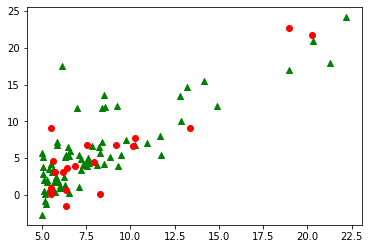

In [966]:
plot_data(X_train, X_test, y_train, y_test)

In [967]:
X_train_norm, mean, std = normalize(X_train)
X = prepare_X(X_train)
theta = np.array([0, 0])

In [968]:
y = y_train[:]

In [969]:
print('X: {}'.format(X.shape))
print('y: {}'.format(y.shape))
print(cost_function(X, y, theta))

X: (77, 2)
y: (77,)
31.033894904546752


In [998]:
alpha = 0.02
num_iters = 1500

In [999]:
new_theta, Js = gradient_descent(X, y, theta, alpha, num_iters, False)
print('Theta 0: {}; Theta 1: {}'.format(new_theta[0], new_theta[1]))
theta_res = normal_eqn(X, y)
print('Theta 0: {}; Theta 1: {}'.format(theta_res[0],theta_res[1]))

Theta 0: -3.367717285464576; Theta 1: 1.1470033712149978
Theta 0: -3.3851180018359583; Theta 1: 1.1487837247047643


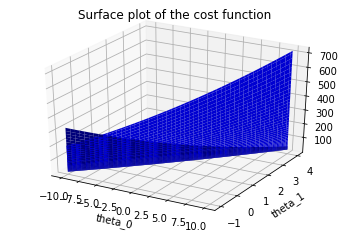

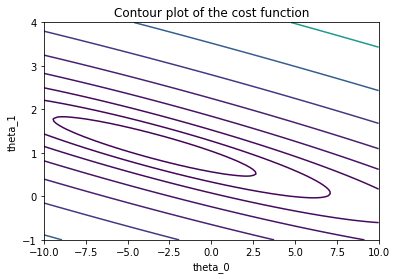

In [1000]:
plot_J(X, y)

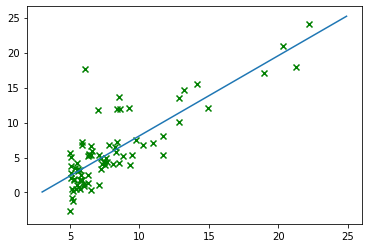

In [1001]:
x = np.arange(3, 25, 0.1)
h = new_theta[0] + new_theta[1]*x

plt.plot(x, h)
plt.scatter(X_train, y_train, marker='x', c='green')

plt.show()

In [993]:
####################
# Нормалізувати тестовий датасет, використовуючи mean, std з тренувального
####################
#X_test_proc = (X_test_proc - mean) / std
X_test_proc = prepare_X(X_test)
y_test_pred = hypothesis(X_test_proc, new_theta)
rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) *100
diff = np.abs(y_test - y_test_pred)
res = pd.DataFrame({'X' : X_test, 'y_actual' : y_test, 'y_pred' : y_test_pred, 'err' : diff})
print(res)
print(cost_function(X_test_proc, y_test, new_theta))

          X  y_actual     y_pred       err
41   6.8825   3.91150   4.526533  0.615033
21  20.2700  21.76700  19.882041  1.884959
35   7.9334   4.56230   5.731919  1.169619
25  18.9450  22.63800  18.362262  4.275738
82   6.3557   0.67861   3.922292  3.243682
68   5.4994   1.01730   2.940113  1.922813
1    5.5277   9.13020   2.972573  6.157627
50   7.5402   6.75040   5.280918  1.469482
86   9.1802   6.79810   7.162003  0.363903
18   6.4296   3.65180   4.007056  0.355256
88   5.5204   0.15200   2.964200  2.812200
67  10.2360   7.77540   8.373009  0.597609
20   6.1891   3.13860   3.731201  0.592601
55   6.3589  -1.42110   3.925962  5.347062
57   5.6397   4.60420   3.101038  1.503162
12   5.7340   3.15510   3.209200  0.054100
94   8.2934   0.14454   6.144840  6.000300
96   5.4369   0.61705   2.868425  2.251375
95  13.3940   9.05510  11.995246  2.940146
70  10.1360   6.67990   8.258309  1.578409
4.245318953433495
